# 3. Calidad de un vino

En este ejercicio, se pretenderá calificar si un vino es de buena o mala calidad. Para esto se analizarán los atributos asociados a las características fisioquímicas asociadas a un vino en particular. Este problema se puede abordar como calificación, ó como una regresión, ya que el atributo a predecir es la calidad del vino que está en un rango de 0 a 10. En este caso se utilizarán 2 sets relacionados con los vinos tintos y blancos del vino portugués "Vinho Verde".

### a) Carga de datos

A continuación se cargan los 2 datasets, además se agrega una columna indicando si el vino es tinto o blanco:

In [1]:
import pandas as pd
df_red = pd.read_csv("winequality/winequality-red.csv",sep=";")
red_wine = len(df_red)
print("Cantidad de vinos tintos:",red_wine)
df_white = pd.read_csv("winequality/winequality-white.csv",sep=";")
white_wine = len(df_white)
print("Cantidad de vinos blancos:",white_wine)
df = pd.concat([df_red,df_white], axis=0)

# Crear columna tipo.
tipo = []
for wine in range(red_wine):
    tipo.append(0)
for wine in range(white_wine):
    tipo.append(1)
df = df.assign(tipo=tipo)

# Si tipo[i] == 0 => tinto, else, vino blanco
# Descripción de dataset.
print("Forma de la matriz:",df.shape)


Cantidad de vinos tintos: 1599
Cantidad de vinos blancos: 4898
Forma de la matriz: (6497, 13)


In [2]:
print("Información de los datos:")
df.info()

Información de los datos:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
tipo                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [3]:
print("Resumen de los datos:")
df.describe()

Resumen de los datos:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [4]:
print("Ejemplos del dataset:")
df.head()

Ejemplos del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Se puede observar que el conjunto consta de 6497 vinos que son variaciones del vino tinto y blanco, donde 1599 son tintos y 4898 corresponden a vinos blancos. Hay 11 atributos fisioquímicos que son números reales y que describen el vino:
<ul>
    <li><strong>acidez fija</strong></li>
    <li><strong>acidez volátil</strong></li> 
    <li><strong>ácido cítrico</strong></li>
    <li><strong>azúcar residual</strong></li>
    <li><strong>cloruros</strong></li>
    <li><strong>dióxido de azufre libre</strong></li>
    <li><strong>dióxido de azufre total</strong></li>
    <li><strong>densidad</strong> </li>
    <li><strong>pH</strong> 
    <li><strong>sulfatos</strong></li>
    <li><strong>alcohol</strong></li>
</ul>

Las otras dos columnas corresponden a datos enteros que corresponden a la calidad, donde su rango es de 0 a 10 y el tipo de vino, que es 1 si es vino blanco y 0 si es tinto.
Por suerte para el modelo, ninguno de estos atributos poseen datos nulos.

### b) Clasificación binaria

Se abordará el problema como clasificación binaria, donde la salida será predecir si es de buena calidad o no, como criterio, si la nota del vino es > 5 será de calidad, y no lo será si es menor a ese valor. Para poder realizar esta tarea se trabaja el dataset que se tiene.

In [2]:
# Para evitar el orden por defecto de las etiquetas.
df = df.sample(frac=1,random_state=44)

#Etiquetas
y = [1 if q>5 else 0 for q in df.quality]
df = df.drop('quality', axis=1)

#Conjuntos
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.25,random_state=42)
print("X_train:"+str(len(X_train)))
print("X_test: "+str(len(X_test)))

X_train:4872
X_test: 1625


En la celda anterior también se crean los conjuntos de entrenamiento y prueba, con 4872 y 1625 ejemplos respectivamente.

In [6]:
import collections
print("Desbalanceo de datos")

counter_tr=collections.Counter(y_train)
print("Conjunto de entrenamiento:",counter_tr)

counter_t=collections.Counter(y_test)
print("Conjunto de pruebas",counter_t)



Desbalanceo de datos
Conjunto de entrenamiento: Counter({1: 3086, 0: 1786})
Conjunto de pruebas Counter({1: 1027, 0: 598})


En esta celda se puede apreciar el desbalanceo de datos, dado que tanto como en el conjunto de entrenamiento como en el de pruebas, la cantidad de vinos de buena calidad casi es el doble de los de mala calidad.

### c) Árbol de Clasificación

A continuación se entrena el primer modelo para clasificar el vino si es de buena calidad o no, para esto se utilizará <strong>un</strong> árbol de clasificación, la configuración será de 30 niveles de profundida máxima y con el criterio de entropía:

In [7]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

n = 30# Tree depth 

model = Tree(random_state=1) 
model.set_params(max_depth=n,criterion='entropy',splitter='best')
model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
print("Miss Classification Loss Tree: %f"%(1-accuracy_score(y_test, y_pred_test)))

#F1-Score
from sklearn.metrics import f1_score
print("[Single Tree] F1 Score train:",f1_score(y_train, y_pred_train))
print("[Single Tree] F1 Score test:", f1_score(y_test, y_pred_test))

Miss Classification Loss Tree: 0.227077
[Single Tree] F1 Score train: 1.0
[Single Tree] F1 Score test: 0.820612542538


Con esta configuración se obtiene un error de 22,7% en el conjunto de pruebas, un *F1-score* de 100% en entrenamiento y 82,06% en el conjunto de test. El *F1-score* está definido por:

<center>$F_{1} = 2 \cdot \frac{PR}{P+R} $</center>

Donde,
<ul>
<li> Precision (P): Capacidad del clasificador de no etiquetar como positiva una muestra que es negativa, y viceversa.</li>
<li> Recall (R): Capacidad del clasificador para encontrar todas las muestras positivas/relevantes.</li>
<li> F1-Score: Puede interpretarse como una media armónica ponderada de precision y recall.</li>
</ul>

### d) Ensamblador de árboles de múltiples niveles : Random Forest

A continuación se entrenará un ensamblador de árboles multinivel con la técnica de Random Forest, se varía la cantidad de árboles de decisión utilizados en el ensamblado:

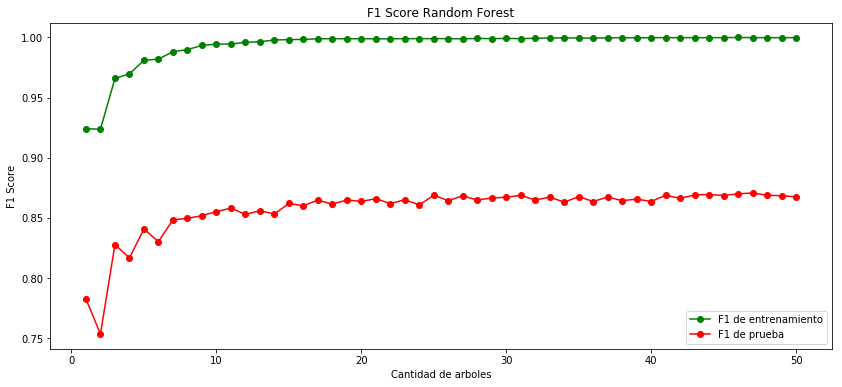

[Random Forest] Valor máximo de F1-Score test: 0.870677404074
[Random Forest] Valor encontrado para una cantidad de ensambladores: 47


In [8]:
from sklearn.ensemble import RandomForestClassifier

f1_train = []
f1_test  = []
error_test = []
# Variar cantidad de arboles
trees = range(1,51)

for n in trees:
    model = RandomForestClassifier(n_estimators=n,criterion="entropy",max_depth=30,n_jobs=-1,random_state=1)
    model.fit(X_train,y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    f1_train.append(f1_score(y_train, y_pred_train))
    f1_test.append(f1_score(y_test, y_pred_test))
    error_test.append((1-accuracy_score(y_test, y_pred_test)))
    

f,axarr = plt.subplots(1,figsize=(14,6))
axarr.plot(trees,f1_train,'go-',label="F1 de entrenamiento")
axarr.plot(trees,f1_test,'ro-',label="F1 de prueba")
axarr.set_title("F1 Score Random Forest")
axarr.set_xlabel('Cantidad de arboles')
axarr.set_ylabel('F1 Score')
#axarr.set_xscale('log')
axarr.legend(loc="lower right", fancybox= True)
plt.show()

print("[Random Forest] Valor máximo de F1-Score test:",max(f1_test))
print("[Random Forest] Valor encontrado para una cantidad de ensambladores:",trees[f1_test.index(max(f1_test))])

In [9]:
print("[Random Forest] Valor mínimo de error de test:",min(error_test))
print("[Random Forest] Valor encontrado para una cantidad de niveles:",trees[error_test.index(min(error_test))])

[Random Forest] Valor mínimo de error de test: 0.168
[Random Forest] Valor encontrado para una cantidad de niveles: 46


En el gráfico anterior se grafica el *F1-score* con Random Forest, se puede observar un aumento considerable de esta medida en comparación con un único árbol. Con 3 árboles ensamblados ya se obtiene un valor de 82.9%, esto es ya, un valor más alto que el encontrado con uno. Con 46 niveles se encontró el mayor valor de *F1-score* de 87%, esto se condice con el error entregado por la metrica accuracy_score el cual sólo calcula precisión, con un error de 16,67%.

### e) Ensamblador de árboles de múltiples niveles : AdaBoost

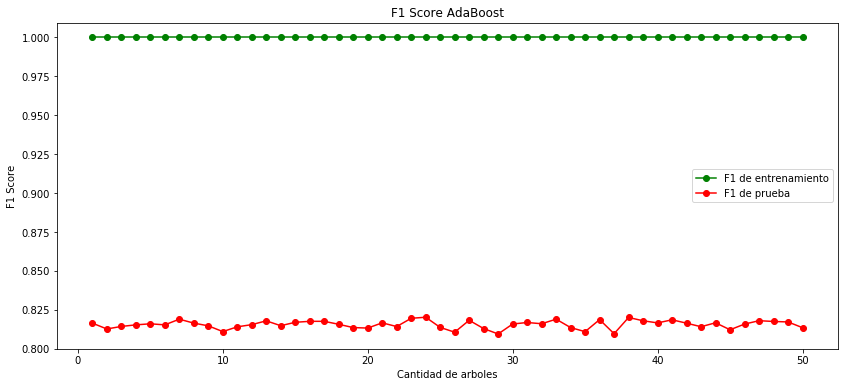

[AdaBoost] Valor máximo de F1-Score test: 0.820186183244
[AdaBoost] Valor encontrado para una cantidad de niveles: 24


In [10]:
from sklearn.ensemble import AdaBoostClassifier

f1_train = []
f1_test  = []

# Variar cantidad de arboles
trees = range(1,51)
for n in trees:
    model = AdaBoostClassifier(base_estimator=Tree(max_depth=30,criterion="entropy"),n_estimators=n)
    model.fit(X_train,y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    f1_train.append(f1_score(y_train, y_pred_train))
    f1_test.append(f1_score(y_test, y_pred_test))
    
f,axarr = plt.subplots(1,figsize=(14,6))
axarr.plot(trees,f1_train,'go-',label="F1 de entrenamiento")
axarr.plot(trees,f1_test,'ro-',label="F1 de prueba")
axarr.set_title("F1 Score AdaBoost")
axarr.set_xlabel('Cantidad de arboles')
axarr.set_ylabel('F1 Score')
#axarr.set_xscale('log')
axarr.legend(loc="right", fancybox= True)
plt.show()

print("[AdaBoost] Valor máximo de F1-Score test:",max(f1_test))
print("[AdaBoost] Valor encontrado para una cantidad de niveles:",trees[f1_test.index(max(f1_test))])

A diferencia de Random Forest, el máximo valor de *F1-score* alcanzado fue de 82,01%, dando a ver que no es tan eficaz como ésta última técnica. Se mantiene en ese promedio en todo el rango de cantidad de árboles. El error de entrenamiento converge al 100% con toda la cantidad de árboles, pero se aprecia que esto no implica que el modelo se comportará así para datos de prueba, se ve claramente que en el gráfico de RF, hay ensamblados que no logran el 100% en entrenamiento pero de igual manera obtienen mayor score en test.

### f) Red Neuronal para clasificación

El mayor F1-score obtenido es de 87%, veremos si con una red neuronal obtenemos un mejor valor.
La configuración es una red simple de 3 capas, las 2 primeras con función de activación RElu y la última una única neurona para efectos de clasificación:

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD,Adagrad
from keras.utils.np_utils import to_categorical


model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], init='uniform', activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, init='uniform', activation='softmax'))
model.compile(optimizer=Adagrad(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, nb_epoch=100, batch_size=128, verbose=1)
evaluate = model.evaluate(X_test,y_test) 
y_red = model.predict(X_test)

from sklearn.metrics import f1_score
print("test accuracy:",evaluate[1])
f1_score(y_test, y_red)



c:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=12, activation="relu", kernel_initializer="uniform")`
  
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="softmax", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
c:\anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
4872/4872 [==============================] - 1s 108us/step - loss: 5.8442 - acc: 0.6334
Epoch 2/100
4872/4872 [==============================] - 0s 17us/step - loss: 5.8442 - acc: 0.6334
Epoch 3/100
4872/4872 [==============================] - 0s 16us/step - loss: 5.8442 - acc: 0.6334
Epoch 4/100
4872/4872 [==============================] - 0s 17us/step - loss: 5.8442 - acc: 0.6334
Epoch 5/100
4872/4872 [==============================] - 0s 17us/step - loss: 5.8442 - acc: 0.6334
Epoch 6/100
4872/4872 [==============================] - 0s 17us/step - loss: 5.8442 - acc: 0.6334
Epoch 7/100
4872/4872 [==============================] - 0s 17us/step - loss: 5.8442 - acc: 0.6334
Epoch 8/100
4872/4872 [==============================] - 0s 16us/step - loss: 5.8442 - acc: 0.6334
Epoch 9/100
4872/4872 [==============================] - 0s 16us/step - loss: 5.8442 - acc: 0.6334
Epoch 10/100
4872/4872 [==============================] - 0s 17us/step - loss: 5.8442 - acc: 0.6334
Epoch 11

4872/4872 [==============================] - 0s 17us/step - loss: 5.8442 - acc: 0.6334
Epoch 84/100
4872/4872 [==============================] - 0s 16us/step - loss: 5.8442 - acc: 0.6334
Epoch 85/100
4872/4872 [==============================] - 0s 16us/step - loss: 5.8442 - acc: 0.6334
Epoch 86/100
4872/4872 [==============================] - 0s 17us/step - loss: 5.8442 - acc: 0.6334
Epoch 87/100
4872/4872 [==============================] - 0s 16us/step - loss: 5.8442 - acc: 0.6334
Epoch 88/100
4872/4872 [==============================] - 0s 15us/step - loss: 5.8442 - acc: 0.6334
Epoch 89/100
4872/4872 [==============================] - 0s 16us/step - loss: 5.8442 - acc: 0.6334
Epoch 90/100
4872/4872 [==============================] - 0s 15us/step - loss: 5.8442 - acc: 0.6334
Epoch 91/100
4872/4872 [==============================] - 0s 14us/step - loss: 5.8442 - acc: 0.6334
Epoch 92/100
4872/4872 [==============================] - 0s 16us/step - loss: 5.8442 - acc: 0.6334
Epoch 93/100


0.77450980392156854

Se obtuvo un valor de 77% en *F1-Score*, aún lejos del 87% alcanzado por Random Forest.

### SVM

In [11]:
from sklearn.svm import SVC as SVM

model= SVM()
model.set_params(C=0.001,kernel='linear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("F1-Score lineal:",f1_score(y_test,y_pred))

model= SVM()
model.set_params(C=0.001,kernel='rbf')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("F1-Score rbf:",f1_score(y_test,y_pred))

F1-Score lineal: 0.782677791021
F1-Score rbf: 0.774509803922


A continuación se ve una tabla resumen con los *F1-Scores* evaluados en el conjunto de test para cada algoritmo en orden descendiente :

| MÉTODOS     | *F1-Score* | 
| ---        | ---:     | 
|RANDOM FOREST| 0.872298 |
|UN ÁRBOL | 0.820612542538 |
| ADABOOST | 0.820186183244|
| SVM LINEAL| 0.782677791021 |
| SVM RBF | 0.774509803922|
|RED NEURONAL| 0.77450980392156854 | 


Ninguna de las técnicas aplicadas al problema superan el F1-score obtenido con Random Forest. Por lo tanto se puede concluir que esta técnica es la mejor  para este ejercicio.

### g) Importancia de atributos en Random Forest

Se utiliza la función de los métodos *.feature\_importances\_* por sklearn para estimar la importancia de los distintos atribudos en el ensamblado RandomForest:

In [45]:
RF = RandomForestClassifier(n_estimators=47,criterion="entropy",max_depth=30,n_jobs=-1,random_state=1)
RF.fit(X_train,y_train)
n = 1
for i in RF.feature_importances_ :
    print("Atributo %d: %f"%(n,i))
    n += 1

Atributo 1: 0.068010
Atributo 2: 0.729099
Atributo 3: 0.018010
Atributo 4: 0.019370
Atributo 5: 0.022029
Atributo 6: 0.019749
Atributo 7: 0.017005
Atributo 8: 0.021684
Atributo 9: 0.023758
Atributo 10: 0.022233
Atributo 11: 0.019398
Atributo 12: 0.019654


Entre los 3 atributos que destacan, está el atributo 2, el 9 y el 10, los cuales corresponden a:

In [53]:
best = [1,8,10]
n = 1
print("Top atributos")
for i in best:
    print("Atributo %d:"%(n)+list(df)[i])
    n += 1

Top atributos
Atributo 1:volatile acidity
Atributo 2:pH
Atributo 3:alcohol


Estos atributos son los más importantes en el ensamblado de RandomForest.

Los atriutos más importantes son obtenidos promediando las tasas de actividad esperadas en varios árboles. La idea es reducir la varianza de dicha estimación y utilizarla para la selección de características.

Así mismo, es posible utilizar este críterio con AdaBoost, de hecho dentro de su implementación en python también tiene disponible el *feature\_importances\_*.
